### Supermarket data science case study - Exploring first data


### Importing packages

In [43]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import altair as alt
import vegafusion as vf
import sklearn
import vega_datasets
from sklearn.pipeline import Pipeline, make_pipeline
import seaborn as sns

### Functions

In [44]:
def f_concat(l_input):

    # Initialize.
    dummy = ""
    n_len = len(l_input)

    if n_len == 1:
        return l_input[0]

    # Loop through text elements.
    for i in range(n_len - 1):
        dummy = dummy + l_input[i] + ", "

    # Append last element.
    dummy = dummy + "and " + l_input[n_len - 1]

    # Return result.
    return dummy

In [45]:
def f_describe(df_input, n_top=10):

    print("First " + str(n_top) + " rows in de data:")
    display(df_input.head(n_top))

    df_numeric = df_input.select_dtypes(
        include=[
            "uint8",
            "uint16",
            "uint32",
            "uint64",
            "int8",
            "int16",
            "int32",
            "int64",
            "float16",
            "float32",
            "float64",
        ]
    )

    if len(df_numeric.columns):
        print("Numerical data:")
        display(df_numeric.describe())

    df_textual = df_input.select_dtypes(include=["category", "object", "bool"])

    if len(df_textual.columns):
        print("Textual data:")
        display(df_textual.describe())

    v_na = [
        col
        + " ("
        + str(df[col].isna().sum())
        + ", "
        + str(round(100 * df[col].isna().sum() / df.shape[0], 1))
        + "%)"
        for col in df.columns
        if df[col].isna().sum() > 0
    ]

    if len(v_na) > 0:
        print("Features and their number of missing values:")
        display(f_concat(v_na))

### Downcast and transform data
Update formatting of features to optimize memory and standardize column names.

In [46]:
def standardize_column_names(s):
    return s.replace(" ", "")


def optimize_memory(df):
    # Change: Objects to Categorical.                                               #WHEN needed to transform Objects to Categorical?
    # object_cols = df.select_dtypes(include="object").columns
    # if not object_cols.empty:
    #     print("Change: Objects to Categorical")
    #     df[object_cols] = df[object_cols].astype("category")

    # Change: Convert integers to smallest unsigned integer and floats to smallest.
    for old, new in [("integer", "unsigned"), ("float", "float")]:
        print("Change: " + old + " --> " + new)
        for col in df.select_dtypes(include=old).columns:
            df[col] = pd.to_numeric(df[col], downcast=new)

    return df


def month_year_to_int(df, i):
    # Change: Month and Year to integer
    if i == 0:
        print("Change: Month and Year to integer")
        df = df.astype({"month": int, "year": int})

    return df

### Transform date-related columns to datetime format.

In [47]:
# Convert datasets to time series
def transform_date_to_datetime(df, i):
    if i == 0:
        print("Change: Transformed 'year', 'month', 'day' columns to Datetime feature")
        df["date"] = pd.to_datetime(df[["year", "month", "day"]], unit="us")

        print(
            "Change: Dropped 'year', 'month', 'day' columns and transformed to Datetime64[us] feature"
        )
        df.drop(columns=["day", "month", "year"], inplace=True)

    else:
        if "date" in df.columns:
            print("Change: Transformed 'date' column to Datetime Dtype")
            df["date"] = pd.to_datetime(df["date"]).dt.tz_localize(None)

    return df

### Import data from local PATH
Import data trough pipeline to downcast the data and transformations

In [48]:
def f_get_data(i=0):

    # Define path.
    c_path = "/Users/Georgi/Documents/EAISI/EASI_4B_Supermarket/Group4B/data/raw/"
    # Identify file.
    v_file = (
        "history-per-year",  # 0
        "history_aggregated",  # 1
        "holidays_events",  # 2
        "items",  # 3
        "oil",  # 4
        "stores",  # 5
        "transactions",
    )  # 6

    # Load data.
    df = (
        pd.read_parquet(c_path + v_file[i] + ".parquet")
        .rename(columns=standardize_column_names)
        .pipe(optimize_memory)
        .pipe(month_year_to_int, i)
        .pipe(transform_date_to_datetime, i)
    )

    # Return data.
    return df

### Importing data

In [49]:
df = f_get_data(0)

Change: integer --> unsigned
Change: float --> float
Change: Month and Year to integer
Change: Transformed 'year', 'month', 'day' columns to Datetime feature
Change: Dropped 'year', 'month', 'day' columns and transformed to Datetime64[us] feature


In [50]:
f_describe(df)

First 10 rows in de data:


,id,store_nbr,item_nbr,unit_sales,onpromotion,date
0,0,25,103665,7.0,<NA>,2013-01-01
1,1,25,105574,1.0,<NA>,2013-01-01
2,2,25,105575,2.0,<NA>,2013-01-01
3,3,25,108079,1.0,<NA>,2013-01-01
4,4,25,108701,1.0,<NA>,2013-01-01
5,5,25,108786,3.0,<NA>,2013-01-01
6,6,25,108797,1.0,<NA>,2013-01-01
7,7,25,108952,1.0,<NA>,2013-01-01
8,8,25,111397,13.0,<NA>,2013-01-01
9,9,25,114790,3.0,<NA>,2013-01-01


Numerical data:


,id,store_nbr,item_nbr,unit_sales
count,1.254970e+08,1.254970e+08,1.254970e+08,1.254970e+08
mean,6.274852e+07,2.746458e+01,9.727692e+05,8.554879e+00
std,3.622788e+07,1.633051e+01,5.205336e+05,2.360515e+01
min,0.000000e+00,1.000000e+00,9.699500e+04,-1.537200e+04
25%,3.137426e+07,1.200000e+01,5.223830e+05,2.000000e+00
50%,6.274852e+07,2.800000e+01,9.595000e+05,4.000000e+00
75%,9.412278e+07,4.300000e+01,1.354380e+06,9.000000e+00
max,1.254970e+08,5.400000e+01,2.127114e+06,8.944000e+04


Textual data:


,onpromotion
count,103839389
unique,2
top,False
freq,96028767


Features and their number of missing values:


'onpromotion (21657651, 17.3%)'

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125497040 entries, 0 to 125497039
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           uint32        
 1   store_nbr    uint8         
 2   item_nbr     uint32        
 3   unit_sales   float32       
 4   onpromotion  boolean       
 5   date         datetime64[ns]
dtypes: boolean(1), datetime64[ns](1), float32(1), uint32(2), uint8(1)
memory usage: 2.7 GB


### Some Statistics:

In [52]:
print("The data\n")
print(
    f"-> Contains:                {round(df.shape[0]/1e6, 1)} million observations and {df.shape[1]} features.\n"
)
print(
    f"-> Contains:                {df.shape[0]} observations and {df.shape[1]} features.\n"
)
print(f"-> Have feature names:      {f_concat(df.columns)}.\n")
print(f"-> Has optimized size of    {round(sys.getsizeof(df)/1024/1024/1024, 2)} GB.")

The data

-> Contains:                125.5 million observations and 6 features.

-> Contains:                125497040 observations and 6 features.

-> Have feature names:      id, store_nbr, item_nbr, unit_sales, onpromotion, and date.

-> Has optimized size of    2.69 GB.


In [53]:
# df = f_get_data(0)
# f_describe(df)

# df.head()
# df.tail(10)
df.sample(20)
# df.info()
# df.describe()
# df.nunique

,id,store_nbr,item_nbr,unit_sales,onpromotion,date
119043784,119043784,44,308085,1.000,False,2017-06-15
75427659,98670339,33,1114566,3.000,True,2016-12-02
40360096,57985542,4,2010918,6.000,False,2015-10-01
94667253,85503747,49,1502391,27.437,False,2016-07-19
94585464,85421958,2,1975512,1.000,False,2016-07-19
11200278,6756810,3,732007,2.000,<NA>,2013-06-10
104967083,104967083,18,1458329,4.000,False,2017-02-02
122667002,122667002,54,1320857,6.000,False,2017-07-19
29094495,22573642,15,851982,3.000,False,2014-04-19
67996424,67996424,9,1081359,1.000,False,2016-01-18


Change: integer --> unsigned
Change: float --> float
First 10 rows in de data:


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
5,105574,GROCERY I,1045,0
6,105575,GROCERY I,1045,0
7,105576,GROCERY I,1045,0
8,105577,GROCERY I,1045,0
9,105693,GROCERY I,1034,0


Numerical data:


,item_nbr,class,perishable
count,4.100000e+03,4100.0000,4100.000000
mean,1.251436e+06,2169.6500,0.240488
std,5.876872e+05,1484.9109,0.427432
min,9.699500e+04,1002.0000,0.000000
25%,8.181108e+05,1068.0000,0.000000
50%,1.306198e+06,2004.0000,0.000000
75%,1.904918e+06,2990.5000,0.000000
max,2.134244e+06,7780.0000,1.000000


Textual data:


,family
count,4100
unique,33
top,GROCERY I
freq,1334


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_nbr    4100 non-null   uint32
 1   family      4100 non-null   object
 2   class       4100 non-null   uint16
 3   perishable  4100 non-null   uint8 
dtypes: object(1), uint16(1), uint32(1), uint8(1)
memory usage: 60.2+ KB


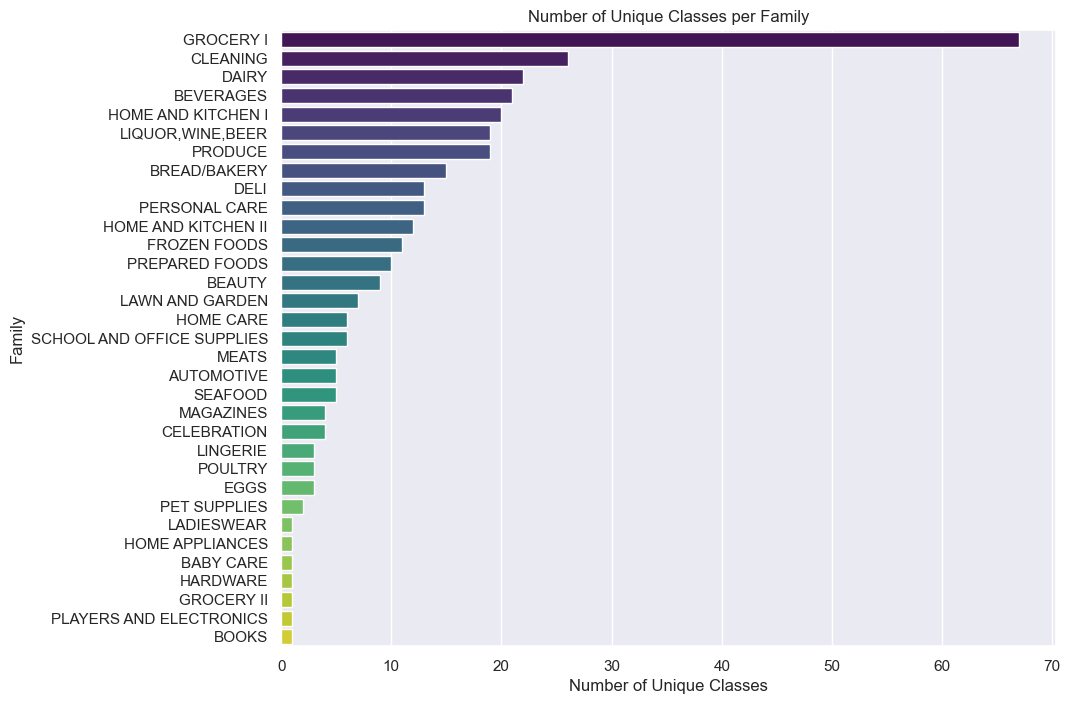

In [54]:
df = f_get_data(3)
f_describe(df)
df.info()

# Count the number of unique classes per family and sort them in descending order
class_counts = df.groupby('family')['class'].nunique().reset_index().sort_values(by='class', ascending=False)

# Plotting the data
plt.figure(figsize=(10, 8))  # Make the plot taller to accommodate vertical bars
sns.barplot(y='family', x='class', data=class_counts, palette='viridis')

# Adding titles and labels
plt.title('Number of Unique Classes per Family')
plt.xlabel('Number of Unique Classes')
plt.ylabel('Family')
plt.show()

In [55]:
# Group by class and count the number of unique families for each class
class_family_counts = df.groupby('class')['family'].nunique().reset_index()

# Filter to find classes that belong to multiple families
classes_in_multiple_families = class_family_counts[class_family_counts['family'] > 1]

print(classes_in_multiple_families)

Empty DataFrame
Columns: [class, family]
Index: []


In [56]:
distinct_classes = df['class'].unique()

# Count the number of distinct classes
num_distinct_classes = len(distinct_classes)

print(f'There are {num_distinct_classes} distinct classes.')
print('The distinct classes are:', distinct_classes)

There are 337 distinct classes.
The distinct classes are: [1093 1067 3008 1028 2712 1045 1034 1044 1092 1032 1030 1075 2636 2644
 3044 1004 2416 2502 1062 3024 1072 1016 4126 3034 1014 1040 1084 7034
 1056 3090 3026 1042 1122 6810 2124 3020 2114 1026 2112 1096 2704 2708
 1013 3038 1048 2116 3032 1124 1066 2718 1236 1080 3004 1058 6824 1136
 3016 1006 2302 1010 2632 2226 2412 1078 1074 1036 3046 3022 3018 1035
 2104 1086 1039 6155 2806 1120 1002 2218 2220 1060 2986 2720 3014 6806
 4114 1087 3015 2702 3006 2752 2652 2630 2640 3010 3012 1024 1038 2716
 1076 2966 1386 2102 7016 2980 2962 3030 1079 1012 2690 1070 2662 3005
 2142 2960 1054 4122 2850 4222 1033 2306 1336 2756 1330 2664 4214 2956
 3028 1338 2802 4254 2722 1027 2642 2854 2222 1005 2228 2238 3060 1318
 3040 1320 2214 6706 2304 1025 2128 6920 2130 1008 3029 3035 2750 1088
 2784 1302 2646 6918 2108 1094 1064 4252 2904 2372 7002 1314 1126 2210
 1022 2714 2156 1138 1003 1364 1380 1029 2504 1132 2242 2654 2122 2246
 2070 1077 1312 695

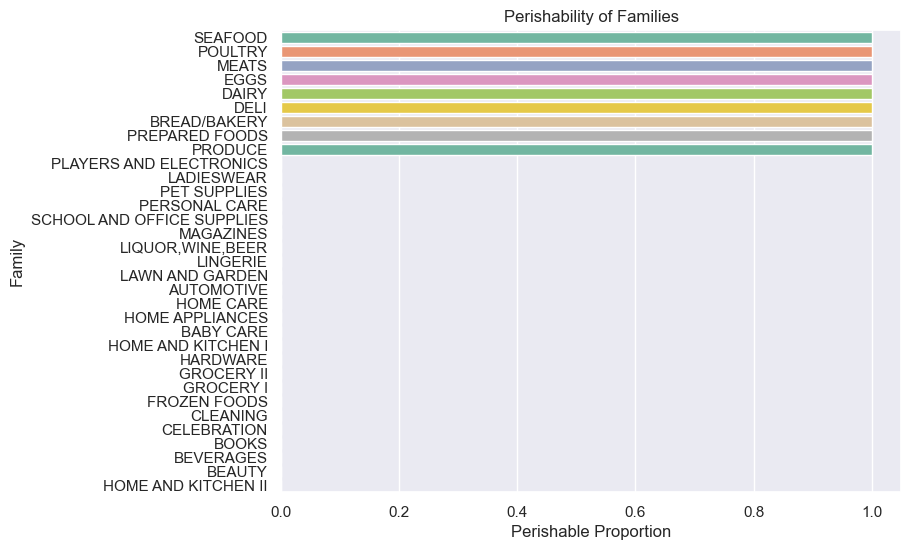

In [57]:
# Group by family and calculate the average perishable value (0 or 1)
family_perishable = df.groupby('family')['perishable'].mean().reset_index()

# Sort by perishable feature
family_perishable_sorted = family_perishable.sort_values(by='perishable', ascending=False)

# Plotting the data
plt.figure(figsize=(8, 6))  # Adjust the size as needed
sns.barplot(x='perishable', y='family', data=family_perishable_sorted, palette='Set2')

# Adding titles and labels
plt.title('Perishability of Families')
plt.xlabel('Perishable Proportion')
plt.ylabel('Family')
plt.show()